# Dataproject of the employmentrate in the danish municipalities

In this dataproject we will describe and analyse the employment rate of the danish municipalities in the period 2008-2018. We will, among other things, analyse the correlation between the employment rate and disposable income in the municipalities together with the correlation between the employment rate and the accidents ratio.
Thus the goal of the project is to come up with different possible explanations to why the employment rate in the danish municipalities is different. We are aware that we cannot based on the analyse, say anything about the causality - to do that we need to perform regressions.
We start by importing and the needed packages; for then to turn to the cleaning proces of the datasets of the variables: Employmentrate, Accidents. 
Finally we will analyse the correlation mentioned above graphically.


1. **Importing needed packages**

***Note*** : Before procedeeing, make sure you have acces to the data used in this project; you will need to instal: pip install git+https://github.com/elben10/pydst in ypur Anaconda Prompt.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import B_funktioner
import pydst as pydst
dst = pydst.Dst(lang='en')



2. **Cleaning process**

This first section collects datasets from DST and cleans in order to get the wanted variables
Collection of datasets and cleaning. To get an overview of which variables are contained in each dataset we start by running the following lines separately. Every dataset is divided into the danish municipalities.



In [3]:
#Running this line gives an overview of the datasets in: Statistics Denmark
dst.get_subjects()

#The dataset of the population size
dst.get_tables(subjects=['02']).head(10)
dst.get_variables(table_id = 'FOLK1A')

#The dataset of the employment rate
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'RAS200')

#The dataset of the number of accidents
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'UHELDK7')

#The dataset of immigrants
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'FOLK1E')

#The dataset of the number of sentences
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'STRAF41')

#The datset of the disposable income
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id='INDKP107')




,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,ENHED,unit,False,False,NaN,"[{'id': '101', 'text': 'People with type of in..."
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,UDDNIV,level of education,False,False,NaN,"[{'id': '10', 'text': '10 BASIC SCHOOL 8-10 gr..."
4,INDKOMSTTYPE,type of income,False,False,NaN,"[{'id': '100', 'text': '1 Disposable income (2..."
5,Tid,time,False,True,NaN,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


In [21]:
#Downloading the population data of the danish municipalities (*note* the structure is almost identical for the other datasets, why the same code will not be explanied every time)

#Downloading and defining the dataset for the population of the danish municipalities
variables = {'OMRÅDE':['*'],'Tid':['*']} 
pop = dst.get_data(table_id = 'FOLK1A', variables=variables)

#Using the functions made in [dataproject.py] to clean and sort the dataset
pop = B_funktioner.initial_rename(pop,'population')
pop = B_funktioner.only_keep_municipalities_and_years(pop,0,2008,2018)
pop = B_funktioner.sort_reset(pop)


# Deleting unnecessary colunms, which we are not going to use
del pop['KØN']; del pop['ALDER']; del pop['CIVILSTAND']
print(pop)


municipality  year  population
0        Aabenraa  2008       60189
1        Aabenraa  2009       60392
2        Aabenraa  2010       59978
3        Aabenraa  2011       59795
4        Aabenraa  2012       59600
...           ...   ...         ...
1062          Ærø  2014        6393
1063          Ærø  2015        6276
1064          Ærø  2016        6290
1065          Ærø  2017        6177
1066          Ærø  2018        6178

[1067 rows x 3 columns]


In [22]:
#Downloading the employment data of the danish municipalities

#downloading and defining the employment data of the danish municipalities
variables={'OMRÅDE':['*'], 'BEREGNING':['*'], 'TID':['*']} 
empl = dst.get_data(table_id = 'RAS200', variables=variables)

#Using the functions made in [dataproject.py]:
empl = B_funktioner.initial_rename(empl,'employment rate')
empl = B_funktioner.only_keep_municipalities_and_years(empl,0,2008,2018)
#empl = B_funktioner.row_chooser(empl,BEREGNING,'Employment rate')



#As we will only examine the employment rate we make use of the following for-loop to eliminate the rows containing data of the "Economic activity rate" 
for val in ['Employment rate']: 
    I = empl.BEREGNING.str.contains(val)
    empl = empl.loc[I == True] # Deleting everything else than the : "Employment rate"


#Sorting the table:
empl= B_funktioner.sort_reset(empl)


#Deleting columns for which we will not examine.
del empl['KØN']; del empl['ALDER']; del empl['HERKOMST']; del empl['BEREGNING']


print(empl) 



municipality  year  employment rate
0        Aabenraa  2008             74.6
1        Aabenraa  2009             71.6
2        Aabenraa  2010             70.9
3        Aabenraa  2011             70.2
4        Aabenraa  2012             69.5
...           ...   ...              ...
1062          Ærø  2014             65.1
1063          Ærø  2015             65.8
1064          Ærø  2016             67.0
1065          Ærø  2017             68.1
1066          Ærø  2018             70.1

[1067 rows x 3 columns]


In [23]:

#Downloading accident data 

#Downloading and defining:
variables={'OMRÅDE':['*'], 'UHELDA':['*'], 'TID':['*']}
accidents = dst.get_data(table_id = 'UHELDK7', variables=variables)

#Using the functions made in [dataproject.py]:
accidents = B_funktioner.initial_rename(accidents,'Number of accidents')
accidents = B_funktioner.only_keep_municipalities_and_years(accidents,0,2008,2018)
#accidents = B_funktioner.row_chooser(accidents,UHELDA,'All accidents')

#The 2 lines below ensures, that we only are going to examine "All accidents" and not the subcategories.
I = accidents.UHELDA.str.contains('All accidents')
accidents = accidents.loc[I == True]

#Sorting
accidents= B_funktioner.sort_reset(accidents)

#Deleting columns for which we will not examine.
del accidents['UHELDA']; del accidents['BYLAND']; del accidents['UHELDSIT']

#Note that years with 0 accidents is left out
print(accidents)



municipality  year  Number of accidents
0       Aabenraa  2008                    4
1       Aabenraa  2009                    4
2       Aabenraa  2010                    1
3       Aabenraa  2011                    4
4       Aabenraa  2012                    4
..           ...   ...                  ...
782          Ærø  2009                    2
783          Ærø  2011                    2
784          Ærø  2015                    2
785          Ærø  2016                    2
786          Ærø  2017                    1

[787 rows x 3 columns]


In [24]:

#Downloading immigrants data 

#Dowloading and defining the data on immigrants from non-western countries in the danish municipalities
variables={'OMRÅDE':['*'],'HERKOMST':{'*'}, 'TID':['*']}
immigrants = dst.get_data(table_id = 'FOLK1E', variables=variables)

#Using the functions made in [dataproject.py]:
immigrants = B_funktioner.initial_rename(immigrants,'Immigrants')
immigrants = B_funktioner.only_keep_municipalities_and_years(immigrants,0,2008,2018)
#immigrants = B_funktioner.row_chooser(immigrants,HERKOMST,'Immigrants from non-western countries')

#The 2 lines below ensures, that we only are going to examine "immigrants from non-western countries"
I = immigrants.HERKOMST.str.contains('Immigrants from non-western countries')
immigrants = immigrants.loc[I == True]


#Deleting columns whcích we are not going to examine:
del immigrants['KØN']; del immigrants['ALDER']; del immigrants['HERKOMST']

#Sorting
immigrants = B_funktioner.sort_reset(immigrants)

print(immigrants)



municipality  year  Immigrants
0        Aabenraa  2008        1787
1        Aabenraa  2009        1822
2        Aabenraa  2010        1817
3        Aabenraa  2011        1887
4        Aabenraa  2012        1906
...           ...   ...         ...
1062          Ærø  2014         104
1063          Ærø  2015         103
1064          Ærø  2016         123
1065          Ærø  2017         145
1066          Ærø  2018         153

[1067 rows x 3 columns]


In [26]:
#Dowloading data on sentences of the danish municipalities

#Downloading and defining:
variables={'OMRÅDE':['*'], 'TID':['*']}
sentences = dst.get_data(table_id = 'STRAF41', variables=variables)

#Using the functions made in [dataproject.py]:
sentences = B_funktioner.initial_rename(sentences,'Number of sentences')
sentences = B_funktioner.only_keep_municipalities_and_years(sentences,0,2008,2018)
sentences = B_funktioner.sort_reset(sentences)


#Deleting columns whcích we are not going to examine:
del sentences['KØN']; del sentences['ALDER']



print(sentences)


municipality  year  Number of sentences
0        Aabenraa  2008                49197
1        Aabenraa  2009                49132
2        Aabenraa  2010                49145
3        Aabenraa  2011                49146
4        Aabenraa  2012                48994
...           ...   ...                  ...
1062          Ærø  2014                 5612
1063          Ærø  2015                 5561
1064          Ærø  2016                 5553
1065          Ærø  2017                 5489
1066          Ærø  2018                 5434

[1067 rows x 3 columns]


In [29]:
#Dowloading data on average disposable income of the danish municipalities

variables={'OMRÅDE':['*'], 'TID':['*'], 'ENHED':['*']} 
avginc = dst.get_data(table_id = 'INDKP107', variables=variables)

#Using the functions made in [dataproject.py]:
avginc = B_funktioner.initial_rename(avginc,'Avg disp income')
avginc = B_funktioner.only_keep_municipalities_and_years(avginc,0,2008,2018)

#The 2 lines below ensures, that we only are going to examine "Average income for all people"
I = avginc.ENHED.str.contains('all people')
avginc = avginc.loc[I == True]

#Sorting
avginc = B_funktioner.sort_reset(avginc)


#Deleting columns whcích we are not going to examine:
del avginc['ENHED']; del avginc['KOEN']; del avginc['UDDNIV']; del avginc['INDKOMSTTYPE']


print(avginc)


,municipality,year,Avg disp income
0,Aabenraa,2008,125064
1,Aabenraa,2009,123277
2,Aabenraa,2010,130019
3,Aabenraa,2011,132330
4,Aabenraa,2012,133960
...,...,...,...
1062,Ærø,2014,132795
1063,Ærø,2015,129903
1064,Ærø,2016,136753
1065,Ærø,2017,142416


In [34]:
#Merge of all the downloaded datasets to one

Tabel1 = pop


Tabel1 = Tabel1.join([empl['employment rate'],immigrants['Immigrants'],sentences['Number of sentences'],avginc['Avg disp income']]) #['x'] tells which columns shall be used / transported to the new main tabel.

#Accidents is done seperatly since it is missing a few observations (namely the ones with 0 accidents)
Tabel1 = Tabel1.merge(accidents, left_on=['municipality','year'], right_on=['municipality','year'], how='left')
Tabel1 = Tabel1.fillna(0) # inserts the 0 at NaN 
Tabel1['Number of accidents'] = Tabel1['Number of accidents'].astype(int)

print(Tabel1)



municipality  year  population  employment rate  Immigrants  \
0        Aabenraa  2008       60189             74.6        1787   
1        Aabenraa  2009       60392             71.6        1822   
2        Aabenraa  2010       59978             70.9        1817   
3        Aabenraa  2011       59795             70.2        1887   
4        Aabenraa  2012       59600             69.5        1906   
...           ...   ...         ...              ...         ...   
1062          Ærø  2014        6393             65.1         104   
1063          Ærø  2015        6276             65.8         103   
1064          Ærø  2016        6290             67.0         123   
1065          Ærø  2017        6177             68.1         145   
1066          Ærø  2018        6178             70.1         153   

      Number of sentences  Avg disp income  Number of accidents  
0                   49197           125064                    4  
1                   49132           123277              

3. **Analyze**


We will convert the absolut numbers in the different categories to ratios, such that it is possible to compare them to the employment rate. We therefore make use of the code below to do this. We calculate the ratio with by

$$
X_{Ratio} = \frac{X_{i,j}}{pop_{i,j}} *100
$$
where *X* is the variable, such aa: "Immigrants" and *pop* is the population size. *i* referes to "*year i*" and *j* refers to "*municipality j*"

In [38]:
# We append Tabel1 with different ratios
Tabel1['Immigrants ratio'] = Tabel1['Immigrants'] / Tabel1['population'] * 100
Tabel1['Accident ratio'] = Tabel1['Number of accidents'] / Tabel1['population'] * 100
Tabel1['Sentences ratio'] = Tabel1['Number of sentences'] / Tabel1['population'] * 100

# Round the Ratios for two decimals
Tabel1['Immigrants ratio'] = Tabel1['Immigrants ratio'].round(2)
Tabel1['Accident ratio'] = Tabel1['Accident ratio'].round(2)
Tabel1['Sentences ratio'] = Tabel1['Sentences ratio'].round(2)


print(Tabel1)


municipality  year  population  employment rate  Immigrants  \
0        Aabenraa  2008       60189             74.6        1787   
1        Aabenraa  2009       60392             71.6        1822   
2        Aabenraa  2010       59978             70.9        1817   
3        Aabenraa  2011       59795             70.2        1887   
4        Aabenraa  2012       59600             69.5        1906   
...           ...   ...         ...              ...         ...   
1062          Ærø  2014        6393             65.1         104   
1063          Ærø  2015        6276             65.8         103   
1064          Ærø  2016        6290             67.0         123   
1065          Ærø  2017        6177             68.1         145   
1066          Ærø  2018        6178             70.1         153   

      Number of sentences  Avg disp income  Number of accidents  \
0                   49197           125064                    4   
1                   49132           123277            

In [39]:
#Defining a new tabel containing only the ratios and the average disposable income
Tabel2 = pop

Tabel2 = Tabel2.join([Tabel1['employment rate'],Tabel1['Accident ratio'],Tabel1['Immigrants ratio'],Tabel1['Sentences ratio'],Tabel1['Avg disp income']])

Tabel2

,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
0,Aabenraa,2008,60189,74.6,0.01,2.97,81.74,125064
1,Aabenraa,2009,60392,71.6,0.01,3.02,81.36,123277
2,Aabenraa,2010,59978,70.9,0.00,3.03,81.94,130019
3,Aabenraa,2011,59795,70.2,0.01,3.16,82.19,132330
4,Aabenraa,2012,59600,69.5,0.01,3.20,82.20,133960
...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,0.00,1.63,87.78,132795
1063,Ærø,2015,6276,65.8,0.03,1.64,88.61,129903
1064,Ærø,2016,6290,67.0,0.03,1.96,88.28,136753
1065,Ærø,2017,6177,68.1,0.02,2.35,88.86,142416


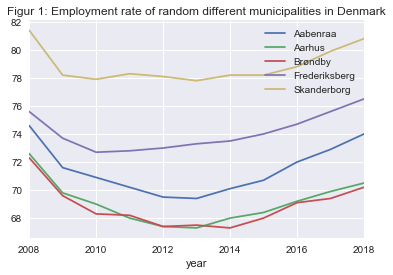

In [40]:
#Here we constructs different graph to see the immediate relations and development of the variables
Employment_Aabenraa_mv = Tabel2[Tabel2['municipality'].isin(['Aabenraa', 'Aarhus', 'København', 'Brøndby', 'Skanderborg', 'Frederiksberg'])] 

def plot(fig):
    fig_employ_muni = fig.set_index('year')
    fig_employ_muni.groupby(['municipality'])['employment rate'].plot(legend=True, grid=True, title='Figur 1: Employment rate of random different municipalities in Denmark');

plot(Employment_Aabenraa_mv)


 

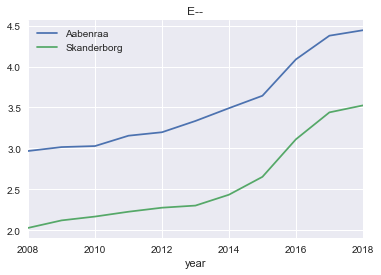

In [13]:
#Here we constructs different graph to see the immediate relations and development of the variables
Immigrants_Aabenraa_mv1 = Tabel2[Tabel2['municipality'].isin(['Aabenraa', 'Skanderborg'])] 

def plot(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['Immigrants ratio'].plot(legend=True, grid=True, title='E--');

plot(Immigrants_Aabenraa_mv1)

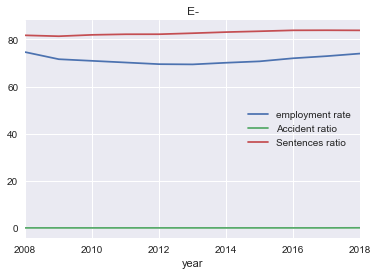

In [14]:
#Here we constructs different graph to see the immediate relations and development of the variables
Emp_acci_sent = Tabel2[Tabel2['municipality'].isin(['Aabenraa'])] 

def plot(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['employment rate', 'Accident ratio', 'Sentences ratio'].plot(legend=True, grid=True, title='E-');

plot(Emp_acci_sent)


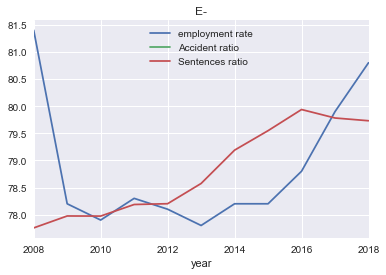

In [15]:
#Here we constructs different graph to see the immediate relations and development of the variables
Emp_acci_sent = Tabel2[Tabel2['municipality'].isin(['Skanderborg'])] 

def plot(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['employment rate', 'Accident ratio', 'Sentences ratio'].plot(legend=True, grid=True, title='E-');

plot(Emp_acci_sent)

In [16]:
# Import figure from bokeh.plotting
import numpy as np
from bokeh.io import push_notebook, show, output_notebook, curdoc
from bokeh.layouts import row, widgetbox, column, gridplot
from bokeh.plotting import figure
from bokeh.models import Dropdown, Select, ColumnDataSource, HoverTool
output_notebook()



source = ColumnDataSource(Tabel2)
hover = HoverTool(tooltips=[('municipality', '@municipality')])


# Below is used to print text in bold
BOLD = '\033[1m'
END = '\033[0m'

# Create plot
print(BOLD + 'employment rate'+ END)
f1 = figure(x_axis_label ='Avg disp income', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f1.circle('Avg disp income', 'employment rate', source=source)
f1.add_tools(hover)

f2 = figure(x_axis_label ='Immigrants ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f2.circle('Immigrants ratio', 'employment rate', source=source)
f2.add_tools(hover)

f3 = figure(x_axis_label ='Sentences ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f3.circle('Sentences ratio', 'employment rate', source=source)
f3.add_tools(hover)

f4 = figure(x_axis_label ='Accident ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f4.circle('Accident ratio', 'employment rate', source=source)
f4.add_tools(hover)

# Display the plot
show(gridplot([[f1,f2],[f3,f4]]))


Loading BokehJS ...

employment rate


The plots above show a positive correlation between the avg. disposable income and employment rate independent of the municipalities. Furthermore we can see, that there is a negativ correlation between the sentences ratio and the employment rate. It is harder to see a correlation between the accident ratio and the employment rate together with the immigrations ratio and the employment rate. A weak conclusion could be that there is ... correlation between the immigration ratio and the employment rate.

4. **Conclusion**